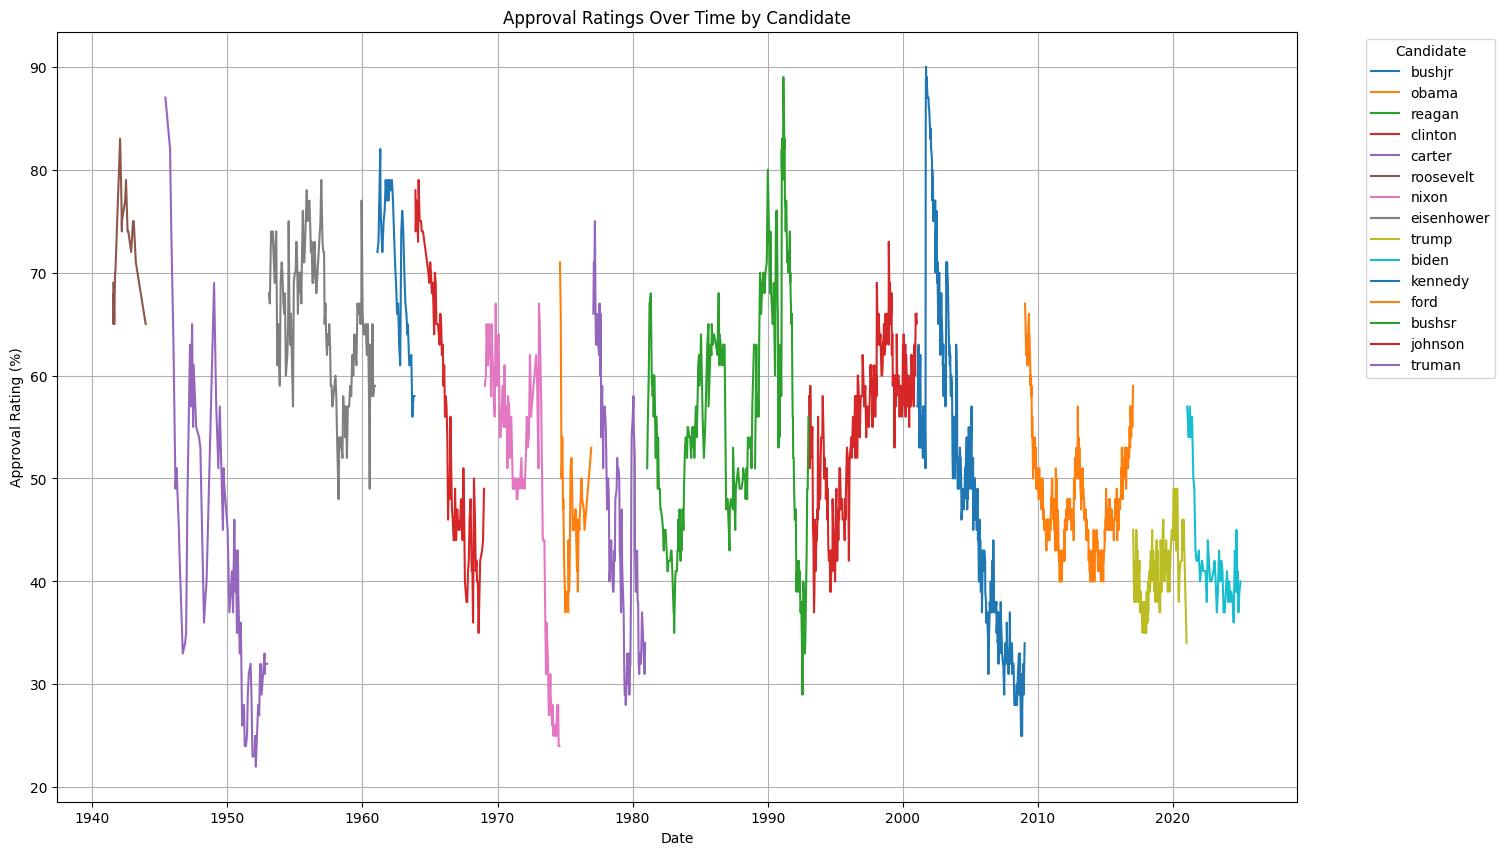

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
files = glob.glob('/content/approval_rating_*.csv')

# combine files into one dataframe + combine data
dfs = []
for file in files:
    df = pd.read_csv(file, sep='\t')  # Adjust separator if needed
    dfs.append(df)
merged_df = pd.concat(dfs, ignore_index=True)

#switch to datetime fromat
merged_df['Start Date'] = pd.to_datetime(merged_df['Start Date'], errors='coerce')


plt.figure(figsize=(16, 10))

# plot each candidate's approval rating as a separate line
for candidate in merged_df['candidate'].unique():
    subset = merged_df[merged_df['candidate'] == candidate]
    plt.plot(subset['Start Date'], subset['Approving'], label=candidate)

# graph formatting
plt.title('Approval Ratings Over Time by Candidate')
plt.xlabel('Date')
plt.ylabel('Approval Rating (%)')
plt.legend(title='Candidate', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
